In [1]:
import pandas as pd

# Load Data

In [36]:
inc = pd.read_csv("malaria_inc.csv")
deathsage = pd.read_csv("malaria_deaths_age.csv")
deaths = pd.read_csv("malaria_deaths.csv")
deathsage = deathsage.iloc[: , 1:]

In [37]:
inc.columns = ["Entity", "Code", "Year", "Incidence of malaria"]
deathsage.columns = ["Entity", "Code", "Year", "Age Group", "Deaths"]
deaths.columns = ["Entity", "Code", "Year", "Deaths per 100K"]

In [38]:
inc.head()

,Entity,Code,Year,Incidence of malaria
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [39]:
deathsage.head()

,Entity,Code,Year,Age Group,Deaths
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193
2,Afghanistan,AFG,1992,Under 5,197.140197
3,Afghanistan,AFG,1993,Under 5,207.357753
4,Afghanistan,AFG,1994,Under 5,226.209363


In [40]:
deaths.head()

,Entity,Code,Year,Deaths per 100K
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [41]:
deathsage["Age Group"] = deathsage["Age Group"].astype(str)

# Data Preprocessing

In [42]:
import os
if os.path.isfile("sgh.db"):
    os.remove("sgh.db")

In [43]:
from sqlalchemy import create_engine
db = create_engine("sqlite:///sgh.db")
conn = db.connect()

In [44]:
inc.to_sql("inc", conn)
deathsage.to_sql("deathsage", conn)
deaths.to_sql("deaths", conn)

In [45]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [46]:
%sql sqlite:///sgh.db

## Visualization 1

From the World Health Organization (WHO) Newroom, malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. Even though this disease is preventable and curable, the WHO African region carries a disproportionately high share of the global malaria burden. Out of which, four African countries accounted for just over half of all malaria deaths worldwide: Nigeria (31.9%), the Democratic Republic of the Congo (13.2%), Tanzania (4.1%) and Mozambique (3.8%). The following visualization serves to investigate the distribution of deaths across the years in these 4 countries.

In [47]:
result1 = %sql SELECT * FROM deathsage WHERE Entity="Nigeria" OR Entity = "Mozambique" OR Entity = "Democratic Republic of Congo" OR Entity = "Tanzania"
data1 = result1.DataFrame().iloc[:,1:]
data1.head()

 * sqlite:///sgh.db
Done.


,Entity,Code,Year,Age Group,Deaths
0,Democratic Republic of Congo,COD,1990,Under 5,63737.689219
1,Democratic Republic of Congo,COD,1991,Under 5,66188.445300
2,Democratic Republic of Congo,COD,1992,Under 5,67660.347067
3,Democratic Republic of Congo,COD,1993,Under 5,69705.791513
4,Democratic Republic of Congo,COD,1994,Under 5,71423.732469


In [48]:
from plotnine import *

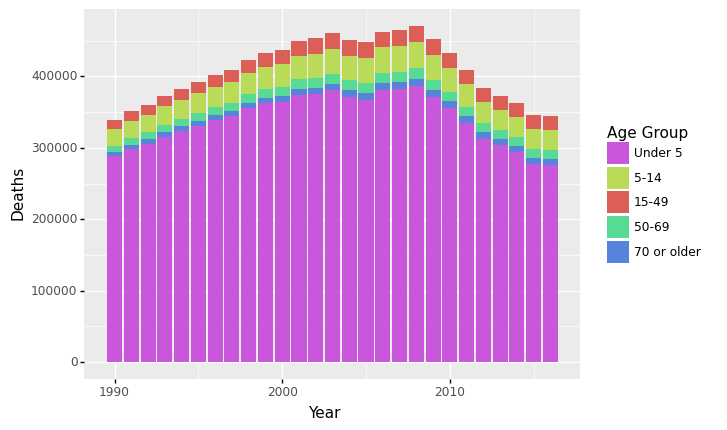

<ggplot: (8783053073869)>

In [49]:
(
    ggplot(aes(x = 'Year', weight = 'Deaths', fill = 'Age Group'), data1) + 
    ylab("Deaths") + 
    geom_bar() + 
    scale_fill_discrete(breaks=['Under 5', '5-14', '15-49', '50-69', '70 or older'])
)

Children under 5 years of age account for most of the malaria deaths in the 4 countries, with an average of about 300,000 deaths per year. As such, the total number of deaths in the 4 countries closely follows the trend of deaths of children under 5.

One reason for this disproportionately large number of deaths in children under 5 is because they have not yet developed immunity to defend themselves against the disease. This can be seen from the graph above, where the number of deaths decrease with age, regardless of year. These countries also do not have sophisticated medical equipments to care for children who have contracted malaria. And the tropical climate of the region provides conducive breeding grounds for mosquitoes.

Measures like providing better healthcare facilities, educating young parents on detecting symptoms of malaria in their children and controlling the mosquito population by spraying insecticide, will all contribute to lowering the number of deaths in children under 5 and also an overall lower number of malaria deaths in these 4 countries.

## Visualization 2

In [50]:
result2 = %sql SELECT * FROM inc
data2 = result2.DataFrame().iloc[:,1:]

 * sqlite:///sgh.db
Done.


In [51]:
continents = pd.read_csv("continents.csv", encoding="ISO-8859-1")
continents.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [52]:
data21 = data2.merge(continents, how="left", left_on="Code", right_on="code_3")
data21 = data21.drop(["country", "Code"], axis=1)

In [53]:
is_NaN = data21.isnull()
row_has_NaN = is_NaN.any(axis=1)
data21 = data21[-(row_has_NaN)]
data21.head()

,Entity,Year,Incidence of malaria,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,2000,107.100000,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Afghanistan,2005,46.500000,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,Afghanistan,2010,23.900000,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
3,Afghanistan,2015,23.600000,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
4,Algeria,2000,0.037746,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0


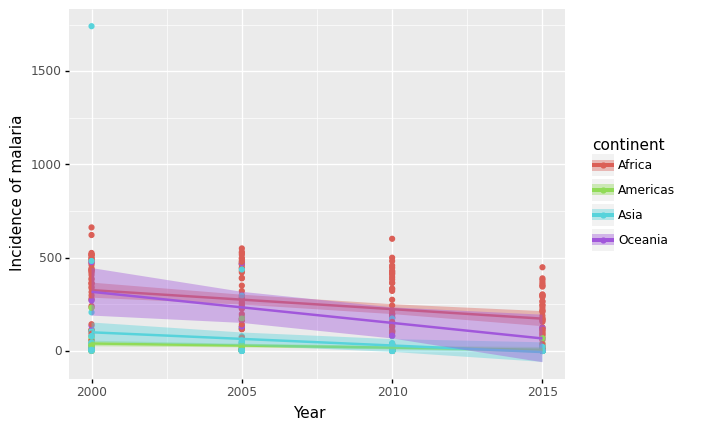

<ggplot: (8783053073848)>

In [54]:
(
    ggplot(aes(x='Year', y='Incidence of malaria', color='continent'), data21) + 
    geom_point() + 
    geom_smooth(aes(fill="continent"), method='lm')
)

I extended the dataset by adding the respective continent of each country and plotted a scatter plot with a linear regression line and standard error band.

African countries generally have a higher incidence of malaria, with a relatively small standard error band which indicates that there is not much variation between the countries. This corresponds with Africa shouldering the highest malaria burden.

Oceania countries have the largest standard error band but also the steepest regression line, which translates to the largest decrease of incidences of malaria over 15 years.

The Americas and Asia have relatively low incidences of malaria, possibly due to socio-economic factors.

## Visualization 3

In [55]:
result3 = %sql SELECT * FROM deaths WHERE Entity LIKE '%SDI' OR Code = "OWID_WRL";
data3 = result3.DataFrame().iloc[:,1:]
data3.head()

 * sqlite:///sgh.db
Done.


,Entity,Code,Year,Deaths per 100K
0,High SDI,None,1990,0.001387
1,High SDI,None,1991,0.001280
2,High SDI,None,1992,0.001165
3,High SDI,None,1993,0.001075
4,High SDI,None,1994,0.001005


In [56]:
data3['Entity'] = data3['Entity'].astype('category')
data3['Entity'] = data3['Entity'].cat.reorder_categories(['World', 'Low SDI', 'Low-middle SDI', 'Middle SDI', 'High-middle SDI', 'High SDI'])

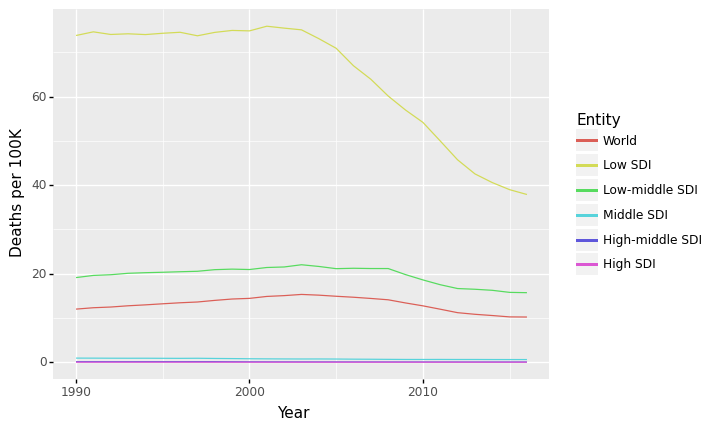

<ggplot: (8783052542627)>

In [57]:
(
    ggplot() + 
    geom_line(aes(x='Year', y='Deaths per 100K', color ="Entity"), data3)
)

Socio-demographic Index (SDI) was a new metric created to measure development of a country. The index captures vital aspects of development like income and education.

Much of African countries fall into the low to low-middle SDI category, and show a corresponding high number of deaths per 100,000 people. It is noted that there is a rapid decrease in the death rate of low SDI countries from 2003 onwards. This may be attributed to the deployment of control methods in African countries.

The number of deaths per 100,000 people from Middle, high-middle and high SDI countries fall well below the global average and has remained relatively constant over the years. Factors like employment, access to education and healthcare play a key role in keeping malaria death rates low.